In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score

2024-02-16 13:12:09.177771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 13:12:09.177882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 13:12:09.342336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
def augmentation(batch_images):
    batch_images=tf.image.random_flip_left_right(batch_images)
    batch_images=tf.image.rot90(batch_images,k=tf.random.uniform(shape=[],minval=0,maxval=4,dtype=tf.int32))

    return batch_images.numpy()

In [6]:
n_train_images=train_images/255.0
augmented_train_images=augmentation(train_images)
n_augmented_train_images=augmented_train_images/255.0
n_test_images=test_images/255.0

In [7]:
def vgg19_model_creation():
    vgg19=tf.keras.applications.VGG19(weights='imagenet',input_shape=(32,32,3),include_top=False)
    model=tf.keras.Sequential()
    model.add(vgg19)
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(256,activation='relu'))
    model.add(tf.keras.layers.Dense(128,activation='relu'))
    model.add(tf.keras.layers.Dense(10,'softmax'))

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    return model


In [8]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3,min_lr=0.0000001)

In [9]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('vgg19.keras',mode='max',monitor='val_accuracy',save_best_only=True)

In [10]:
vgg19_model=vgg19_model_creation()
history=vgg19_model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/50


I0000 00:00:1708089159.546690      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 68s 37ms/step - loss: 1.9343 - accuracy: 0.2136 - val_loss: 1.7900 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 57s 37ms/step - loss: 1.7013 - accuracy: 0.3073 - val_loss: 1.6487 - val_accuracy: 0.3273 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6839 - accuracy: 0.3170 - val_loss: 1.5338 - val_accuracy: 0.3876 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4970 - accuracy: 0.4130 - val_loss: 1.4360 - val_accuracy: 0.4508 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3006 - accuracy: 0.5039 - val_loss: 1.2966 - val_accuracy: 0.5524 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 59s 37ms/step - loss: 1.2063 - accuracy: 0.5602 - val_loss: 1.0988 - val_accuracy: 0.6177 - lr: 0.0010
Epoch 7/50
1563/1563 [==============================] - 5

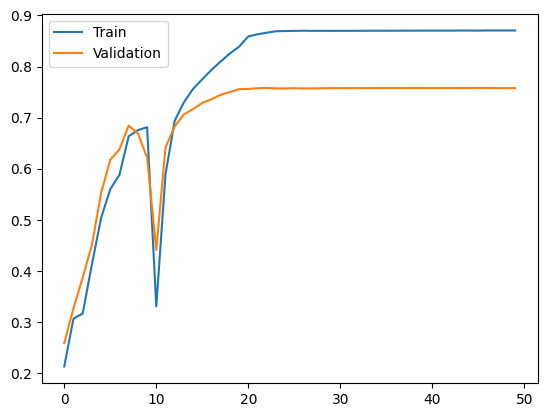

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [12]:
vgg19_model.load_weights('vgg19.keras')
vgg19_model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.9277 - accuracy: 0.7582


[0.9276711940765381, 0.7581999897956848]

In [13]:
y_pred=vgg19_model.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 3s 8ms/step


In [14]:
print(accuracy_score(y_pred,test_labels))
print(precision_score(y_pred,test_labels,average='weighted'))
print(recall_score(y_pred,test_labels,average='weighted'))

0.7582
0.7587870999999999
0.7582
